## Decision Tree

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree
import pickle

In [2]:
# Load data from CSV
df = pd.read_csv("processed_data.csv")

#Check the df
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [3]:
# Define the features and target variables
X = df.drop(["Exited", "CustomerId"], axis=1)
y = df["Exited"]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create the Decision Tree Classifier model and fit it to the training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
# Serialize the model object using pickle
with open('dtc_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)

In [7]:
# Load the saved model object
with open('dtc_model.pkl', 'rb') as file:
    dtc_loaded = pickle.load(file)

In [8]:
# Predict the target variable for the test data
y_pred = dtc.predict(X_test)

In [9]:
# Print the confusion matrix and classification report for the model's performance on the test data
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1359  248]
 [ 193  200]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



In [10]:
# Print the accuracy score for the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.95%


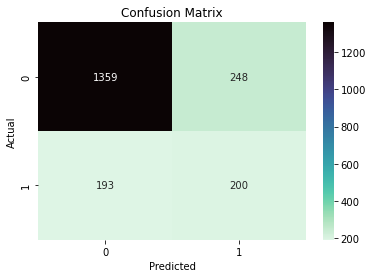

In [11]:
#Create a more visual Confusion Matrix 
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='mako_r', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Tree Visualisation 

In [12]:
## Import the dependencies 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

In [13]:
# Create DOT data
dot_data = export_graphviz(
    dtc, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.528526 to fit



In [14]:
# Saving the tree as PDF
file_path = ("Bank_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("Bank_tree.png")
graph.write_png(file_path)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.528526 to fit



True